Make a scene using the PS1 catalog

In [2]:
from syndiff import ps1_data

ModuleNotFoundError: No module named 'syndiff'

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path
sys.path.append('../scenes/')
import syndiff as sd 
import delta_kernal as dk

In [3]:
# SN2020amx
ra = 148.5706917	
dec = 51.68126944
# SN2020fqv
ra = 189.1385827     
dec = 11.2316599
#SN 2020ftl
#ra = 185.0157359	
#dec = 5.343323863
# test field
ra = 120.434250672726+0.25
dec = 45.293553239629475

88


<IPython.core.display.Javascript object>


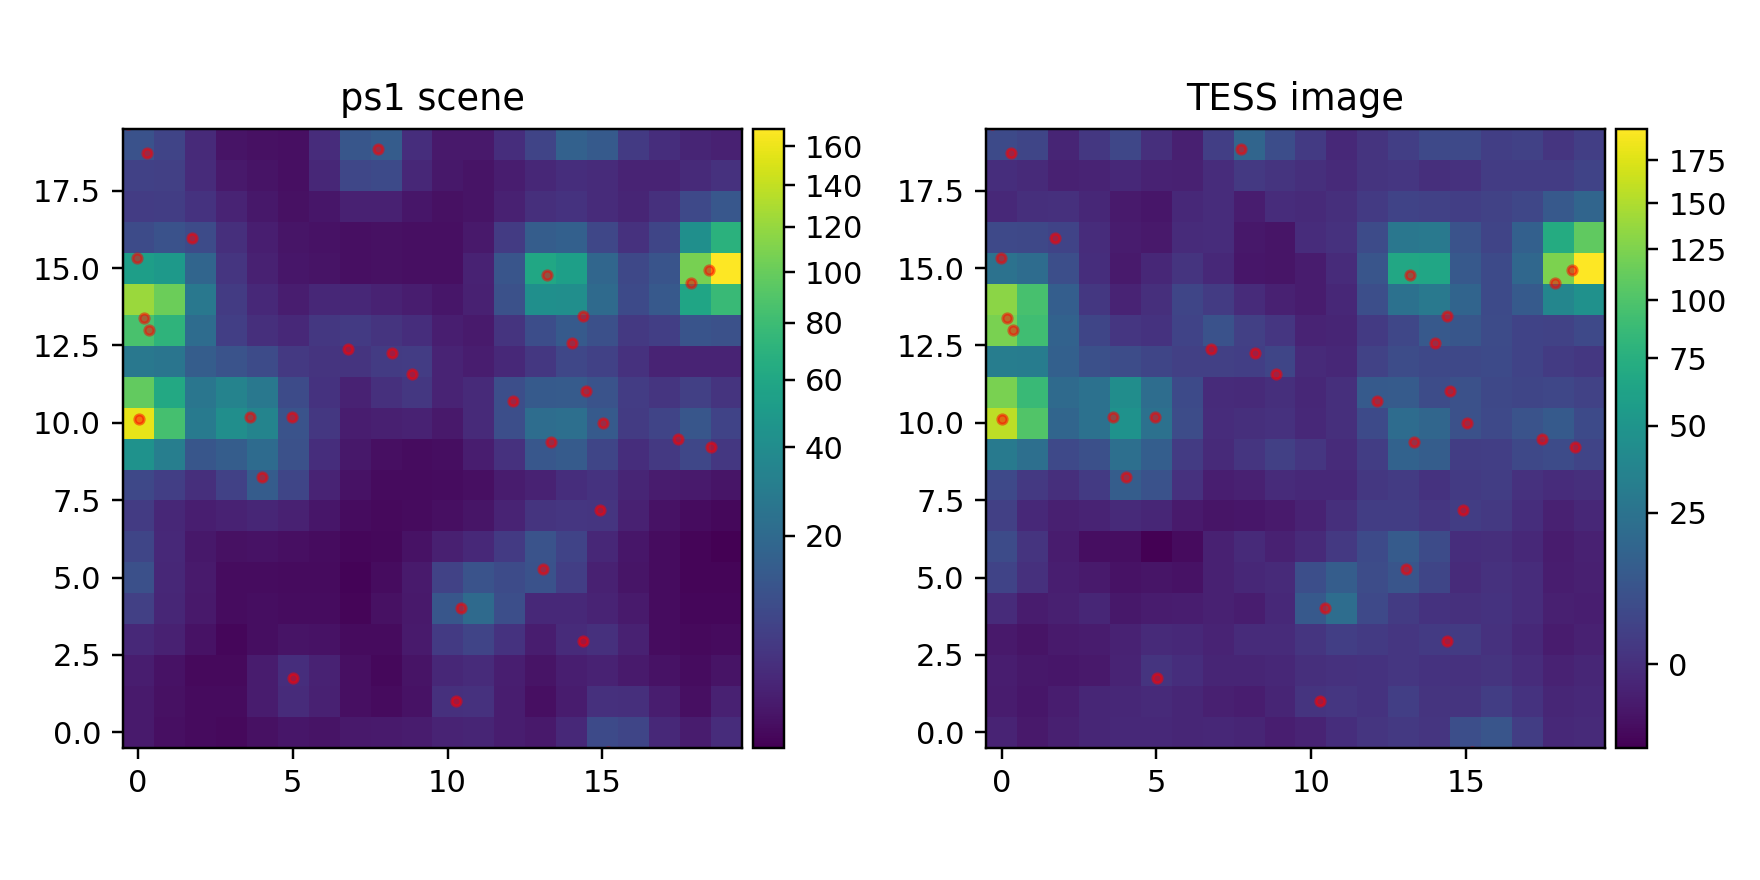

In [13]:
scene = sd.Catalog_scene(ra,dec,20,Maglim= 18, Sector=20, Catalog='ps1',
                         Interpolate=True,Plot=True,Zeropoint=21.1,xoff =0.2,yoff=0.3)#,Save='PS1_catalog_scene.pdf')


array([[115.883026, 115.146706, 115.85596 , 116.39036 , 116.774124,
        116.514404, 116.49224 , 117.29596 , 116.59566 , 115.944534,
        115.9719  , 118.08207 , 118.778275, 119.654236, 119.16742 ,
        125.389565, 128.65218 , 120.97204 , 116.99848 , 117.40502 ],
       [115.952515, 115.5363  , 115.845535, 116.6873  , 116.295044,
        117.30444 , 116.67623 , 115.67145 , 115.45185 , 116.2347  ,
        119.44098 , 120.345085, 118.10707 , 120.796394, 118.8092  ,
        118.008385, 120.2929  , 118.8954  , 116.79947 , 116.90532 ],
       [116.41725 , 114.66252 , 115.50267 , 115.37173 , 116.828835,
        119.27303 , 118.191635, 116.428665, 116.498955, 117.14339 ,
        117.27916 , 118.272995, 118.28883 , 119.16723 , 118.76563 ,
        118.2218  , 118.51282 , 117.14716 , 116.28091 , 116.39568 ],
       [115.20935 , 115.33728 , 114.90173 , 115.63394 , 116.567345,
        117.22566 , 116.36731 , 116.38727 , 117.04794 , 117.54773 ,
        119.37972 , 122.24709 , 120.13409 , 1

<IPython.core.display.Javascript object>


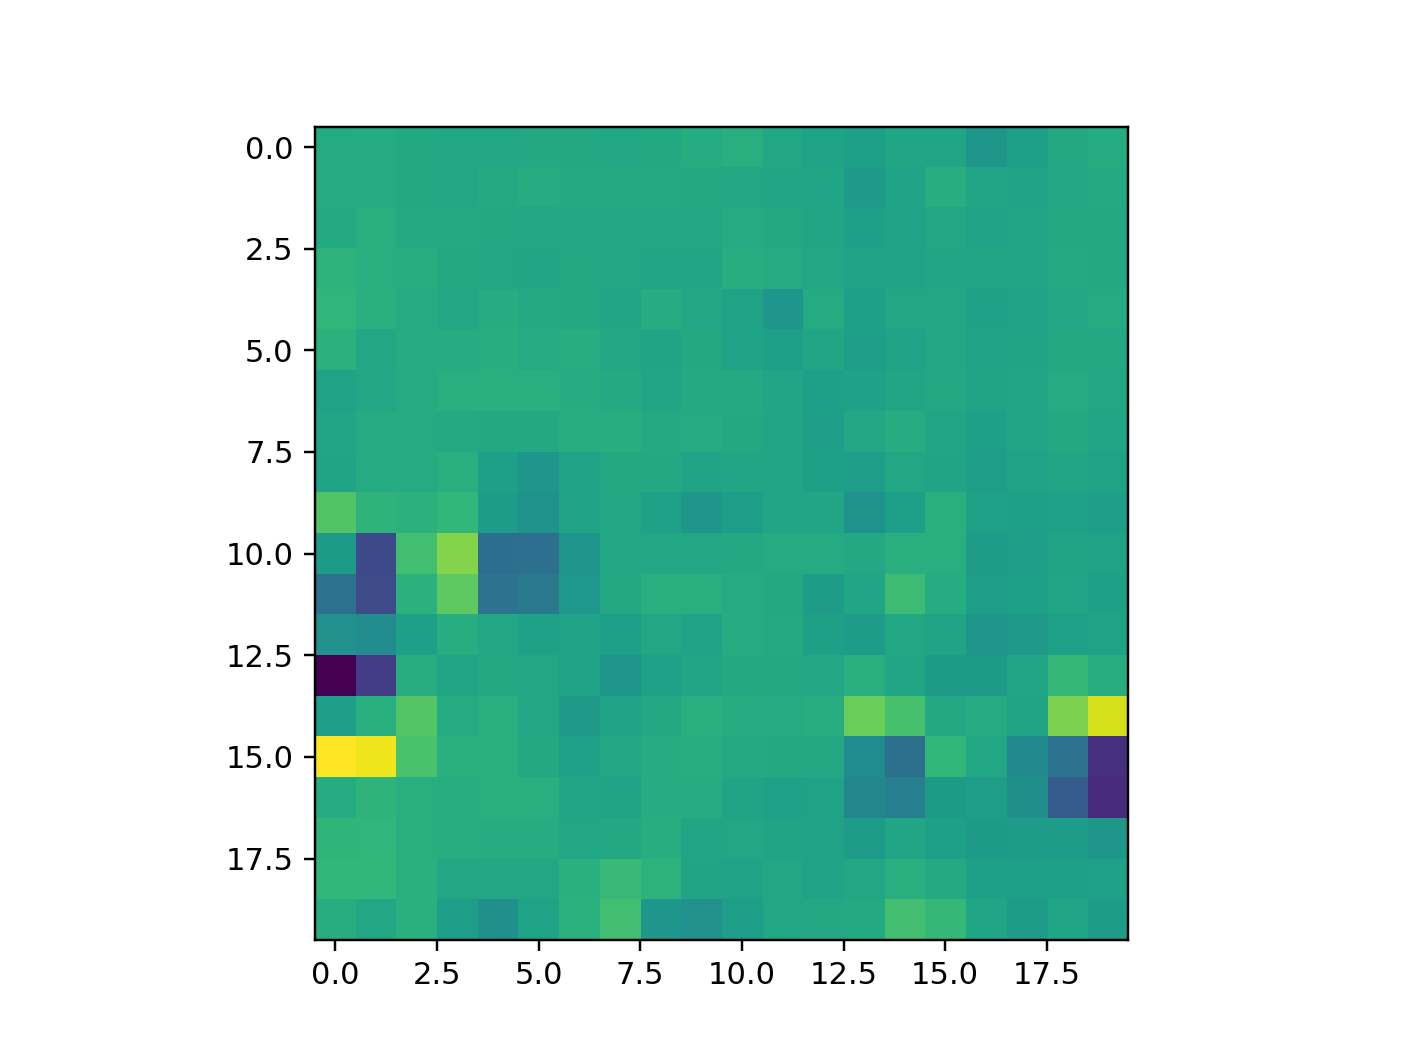

In [23]:
plt.figure()
plt.imshow(np.nansum(scene['sources'],axis=0)-scene['tpf'].flux.value[100])

In [8]:
def PS1_to_TESS_mag(PS1):
    """
    https://arxiv.org/pdf/1706.00495.pdf pg.9
    """
    coeffs = np.array([0.6767,0.9751,0.9773,0.6725])
    #g = PS1.gmag.values
    r = PS1.rmag.values
    i = PS1.imag.values
    #z = PS1.zmag.values
    #y = PS1.ymag.values

    t = coeffs[0] * r + coeffs[1] * i #+ coeffs[2] * z + coeffs[3] * y
    #i - 0.00206*(g - i)**3 - 0.02370*(g - i)**2 + 0.00573*(g - i) - 0.3078
    PS1['tmag'] = t
    return PS1

def Get_PS1(tpf, magnitude_limit = 18, Offset = 10):
    """
    Get the coordinates and mag of all PS1 sources in the field of view.

    -------
    Inputs-
    -------
        tpf 				class 	target pixel file lightkurve class
        magnitude_limit 	float 	cutoff for Gaia sources
        Offset 				int 	offset for the boundary 

    --------
    Outputs-
    --------
        coords 	array	coordinates of sources
        Gmag 	array 	Gmags of sources
    """
    result =  sd.Get_Catalogue(tpf, Catalog = 'ps1')
    result = result[np.isfinite(result.rmag) & np.isfinite(result.imag)]# & np.isfinite(result.zmag)& np.isfinite(result.ymag)]
    result = PS1_to_TESS_mag(result)
    print()


    result = result[result.tmag < magnitude_limit]
    if len(result) == 0:
        raise no_targets_found_message
    radecs = np.vstack([result['RAJ2000'], result['DEJ2000']]).T
    coords = tpf.wcs.all_world2pix(radecs, 0) ## TODO, is origin supposed to be zero or one?
    Tessmag = result['tmag'].values
    #Jmag = result['Jmag']
    ind = (((coords[:,0] >= -10) & (coords[:,1] >= -10)) & 
           ((coords[:,0] < (tpf.shape[1] + 10)) & (coords[:,1] < (tpf.shape[2] + 10))))
    coords = coords[ind]
    Tessmag = Tessmag[ind]
    #Jmag = Jmag[ind]
    return coords, Tessmag

In [9]:
tpf = sd.Get_TESS(ra,dec,20)

In [16]:
result =  sd.Get_Catalogue(tpf, Catalog = 'ps1')

In [18]:
result = result[np.isfinite(result.rmag) & np.isfinite(result.imag) & np.isfinite(result.zmag)& np.isfinite(result.ymag)]
result = PS1_to_TESS_mag(result)

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
result

,RAJ2000,DEJ2000,objID,f_objID,Qual,e_RAJ2000,e_DEJ2000,_tab1_10,Ns,Nd,...,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags,tmag
9,189.183498,11.133010,121361891835630129,436527104,52,0.0040,0.0055,55903.662141,5,76,...,0.0052,17.9549,0.0133,115000,17.7976,0.0067,17.9086,0.0182,115000,29.776195
10,189.175247,11.123413,121341891753558700,444915712,53,0.0084,0.0110,55949.728160,5,81,...,0.0694,19.2705,0.0187,16892216,19.5078,0.0757,19.1853,0.0506,16892216,32.324033
15,189.209747,11.143827,121371892097793080,436527104,52,0.0253,0.0246,56019.069873,5,39,...,0.0451,20.5125,0.0854,16892216,19.7771,0.0757,NaN,NaN,16892216,35.027067
16,189.198455,11.138362,121361891984906562,436527104,52,0.0142,0.0210,55930.789572,5,64,...,0.0836,20.3398,0.0444,16892216,20.3893,0.1713,19.7571,0.1776,115000,34.519968
18,189.196587,11.146307,121371891966686147,436527232,52,0.0107,0.0084,55956.821725,5,69,...,0.0075,19.1493,0.0296,115000,18.8174,0.0161,18.7850,0.0374,115000,32.992949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,189.131256,11.332388,121591891313279504,444915712,53,0.0328,0.0384,55950.855278,5,33,...,0.0456,20.3925,0.1492,16892216,20.0088,0.2190,20.0560,0.2813,115000,35.243602
1294,189.076378,11.322012,121581890764186948,444915712,53,0.0284,0.0177,56106.297824,5,39,...,0.1060,19.9118,0.0853,16892216,19.7584,0.1679,19.3509,0.2390,16892216,34.719427
1296,189.084170,11.331124,121591890841647922,503635968,60,0.0079,0.0038,55945.014144,5,85,...,0.0089,17.5681,0.0092,115000,17.2276,0.0062,17.3006,0.0097,115000,30.563301
1297,189.141426,11.344718,121611891415264130,436527104,52,0.0260,0.0170,56032.989236,5,51,...,0.0385,20.4002,0.1136,16892216,20.1203,0.0898,19.7848,0.2259,115000,34.475539


In [ ]:
np.sqrt((posp[0,0]-posg[0,0])**2 + (posp[0,1]-posg[0,1])**2)

In [ ]:
print(Tmagg[0],Tmagp[0])

In [ ]:
for i in range(len(posg)):
    dist = np.sqrt((posp[i,0]-posg[:,0])**2 + (posp[i,1]-posg[:,1])**2)
    dist = dist > 0.001
    for j in range(sum(dist)):
        if abs(Tmagg[i] - Tmagp[dist]) > .1:
            ind += []

In [ ]:
posp

In [ ]:
posg

In [ ]:
cus = np.ones_like(tpf.flux[0])
#cus[20:29,20:29] = 0
cus[22:30,22:30] = 0
bkg = sd.Scene_bkg_estimate(scene,tpf,Limit=.3,Custom_mask=cus)

flux = tpf.flux - bkg
#flux[flux == 0] = np.nan

In [ ]:
plt.figure()
plt.imshow(bkg[1000],origin='lower',vmax=200)
plt.colorbar()
plt.figure()
plt.imshow(flux[1000],origin='lower',vmax=100)
plt.colorbar()

In [ ]:
plt.figure()
#plt.plot(tpf.astropy_time.mjd,tpf.flux[:,15,15])
plt.plot(tpf.astropy_time.mjd,flux[:,24,26],'.')
plt.axvline(58930,c='k')

In [ ]:
plt.figure()
#for i in range(15):
plt.plot(tpf.astropy_time.mjd,flux[:,26,26],'.',label=str(i))
plt.axvline(58930,c='k')
plt.legend()

In [ ]:
pos, Tmag = sd.Get_PS1(tpf,magnitude_limit=18)
pos_shift = pos+.5
ind = ((2< pos_shift[:,0]) & (pos_shift[:,0]< tpf.shape[1]-2) & 
      (2< pos_shift[:,1]) & (pos_shift[:,1]< tpf.shape[1]-2) &
      (Tmag < 16))
p = pos_shift[ind,:]

In [ ]:
distance= np.zeros([len(p),len(p)])
for i in range(len(p)):
    distance[i] = np.sqrt((p[i,0] - p[:,0])**2 + (p[i,1] - p[:,1])**2)
distance[distance==0] = np.nan

In [ ]:
def Isolated_stars(pos,Tmag,flux,sources, Distance = 7, Mag = 16):
    """
    Find isolated stars in the scene.
    """
    #pos, Tmag = sd.Get_PS1(tpf,magnitude_limit=18)
    pos_shift = pos+.5
    ind = ((2< pos_shift[:,0]) & (pos_shift[:,0]< flux.shape[1]-2) & 
          (2< pos_shift[:,1]) & (pos_shift[:,1]< flux.shape[1]-2) &
          (Tmag < Mag))
    if ~ind.any():
        raise ValueError('No sources brighter than {} Tmag.'.format(Mag))
    p = pos_shift[ind,:]
    distance= np.zeros([len(p),len(p)])
    for i in range(len(p)):
        distance[i] = np.sqrt((p[i,0] - p[:,0])**2 + (p[i,1] - p[:,1])**2)
    distance[distance==0] = np.nan
    mins = np.nanmin(distance,axis=1)
    iso = p[mins > Distance]
    iso = iso.astype('int')
    iso_s = scene[ind]
    iso_s = iso_s[mins > Distance]
    median = np.nanmedian(flux,axis=0)
    if len(iso)> 0:
        clips = []
        if (Distance % 2) ==0:
            d = Distance - 1
        else:
            d = Distance
        u = d//2 +1 
        l = d //2 
        
        for i in range(len(iso)):
            clips += [[iso_s[i,iso[i,1]-l:iso[i,1]+u,iso[i,0]-l:iso[i,0]+u],
                     median[iso[i,1]-l:iso[i,1]+u,iso[i,0]-l:iso[i,0]+u]]]
        clips=np.array(clips)
    else:
        raise ValueError('No stars brighter than {} Tmag and isolated by {} pix. Concider lowering brightness.'.format(Mag,Distance))
    return clips

In [ ]:
pos, Tmag = sd.Get_PS1(tpf,magnitude_limit=18)
iso = Isolated_stars(pos,Tmag,flux,scene,Mag=16)

In [ ]:
len(iso)

In [ ]:
plt.figure()

plt.imshow(iso[2,1],origin='')

In [ ]:
def Isolated_kernals(Sources,Size=5,Scenes = False,Median = True):
    '''
    Calculate the Delta convolution kernals for isolated sources.
    
    -------
    Inputs-
    -------
        Sources  array   n x 2 array of images. 0 is scene, 1 is observation
        Size     int     Size of the delta kernal
    --------
    Options-
    --------
        Scenes   bool  If True, it uses the provided scene as the template
        Median   bool  If True, returns the median of all delta kernals
        
    -------
    Output-
    -------
        Kernals  array  If Median == True, returns single kernal, if not, 
                        returns n kernal array
        
    '''
    kernals = []
    for i in range(len(Sources)):
        star = Sources[i,1]
        if scenes:
            blank = Sources[i,0]
        else:
            blank = np.zeros_like(test)
            blank[blank.shape[0]//2+1,blank.shape[1]//2+1] = np.nansum(test)
        k = Delta_kernal(blank,test,Size=Size,Normalise=False)
        kernals += [k]
    kernals = np.array(kernals)
    if Median:
        return np.nanmedian(kernals,axis=0)
    else:
        return kernals

In [ ]:
k = Isolated_kernals(iso)

In [ ]:
plt.figure()
plt.imshow(k,origin='')
plt.colorbar()

In [ ]:
blank = np.zeros_like(test)
blank[blank.shape[0]//2+1,blank.shape[1]//2+1] = np.nansum(test)

In [ ]:
k = Delta_kernal(blank,test,Size=5,Normalise=False)

In [ ]:
def Delta_kernal(Scene,Image,Size=13,Normalise=True):
	Basis, coeff_0 = dk.Delta_basis(Size)
	bds = []
	for i in range(len(coeff_0)):
		bds += [(0,1)]
	res = dk.minimize(dk.optimize_delta, coeff_0, args=(Basis,Scene,Image,Normalise),
				   bounds=bds,options={'disp': True})
	k = np.nansum(res.x[:,np.newaxis,np.newaxis]*Basis,axis=0)
	return k

def Convolve_image(Image,Kernal):
	template = dk.signal.fftconvolve(Image, Kernal, mode='same')
	return template

In [ ]:
eh = Convolve_image(blank,k)

In [ ]:
np.max(blank)

In [ ]:
plt.figure()
plt.imshow(k,origin='')
plt.colorbar()
plt.figure()
plt.imshow(eh-test,origin='')
plt.colorbar()

In [ ]:
np.nansum(eh-test)

In [ ]:
iso = p[mins > 4]
iso = iso.astype('int')
iso_s = scene[ind]
iso_s = iso_s[mins > 4]

In [ ]:
iso

In [ ]:
from photutils import psf

In [ ]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(clips[2,0],origin='')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(clips[2,1],origin='')
plt.colorbar()

In [ ]:
kernals = []
for i in range(clips.shape[0]):
    kernals += [Delta_kernal(clips[i,0],clips[i,1],Size=5)]
kernals = np.array(kernals)

In [ ]:
for i in kernals:
    plt.figure()
    plt.imshow(i,origin='')
    plt.colorbar()

In [ ]:
plt.figure()
plt.imshow(np.nanmedian(kernals,axis=0),origin='',vmax=.1)
plt.colorbar()

In [ ]:
np.nansum(kernal)

In [ ]:
kernal = np.nanmedian(kernals,axis=0)
kernal = kernal / np.nansum(kernal)
template = dk.signal.fftconvolve(np.nansum(scene,axis=0), kernal, mode='same')

In [ ]:
plt.figure()
plt.imshow(median-template,origin='',vmax = 100)
plt.colorbar()

In [ ]:
test = flux - template

In [ ]:
plt.figure()
plt.plot(flux[:,15,15])
plt.plot(test[:,15,15])

In [ ]:
t=tpf.astropy_time.mjd
plt.figure(figsize=(8,4))
plt.suptitle('2020amx\n',fontsize=15)
plt.subplot(1,3,1)
plt.title('Raw data')
plt.plot(t,tpf.flux[:,15,15],'.')
plt.ylabel('Counts')
plt.subplot(1,3,2)
plt.title(' $1- $Syndiff bkg')
plt.plot(t,flux[:,15,15],'.')
plt.xlabel('MJD')
plt.subplot(1,3,3)
plt.title(' $2-$ PS1 catalog scene')
plt.plot(t,test[:,15,15],'.')
plt.savefig('2020amx_sndiff_test.pdf')


In [ ]:
def Delta_kernal(Scene,Image,Size=13):
	Basis, coeff_0 = dk.Delta_basis(Size)
	bds = []
	for i in range(len(coeff_0)):
		bds += [(0,1)]
	res = dk.minimize(optimize_delta, coeff_0, args=(Basis,Scene,Image),
				   bounds=bds,options={'disp': True})
	k = np.nansum(res.x[:,np.newaxis,np.newaxis]*Basis,axis=0)
	return k

def optimize_delta(Coeff, Basis, Scene, TESS, Normalise = True, Offset = False):
	Kernal = np.nansum(Coeff[:,np.newaxis,np.newaxis]*Basis,axis=0)
	template = dk.signal.fftconvolve(Scene, Kernal, mode='same')
	if Offset:
		template = template[offset1:int(3*offset1),offset2-1:int(3*offset2-1)]

	if Normalise:
		template = template / np.nanmax(template)
		tess = TESS.copy() / np.nanmax(TESS)
	else:
		template = template 
		tess = TESS.copy()
	
	return np.nansum(abs(tess - template))

In [ ]:
def PS1_to_TESS_mag(PS1):
    g = PS1.gKmag.values
    i = PS1.iKmag.values
    t = i - 0.00206*(g - i)**3 - 0.02370*(g - i)**2 + 0.00573*(g - i) - 0.3078
    PS1['tmag'] = t
    return PS1

In [ ]:
def Get_PS1(tpf, magnitude_limit = 18, Offset = 10):
    """
    Get the coordinates and mag of all PS1 sources in the field of view.

    -------
    Inputs-
    -------
        tpf 				class 	target pixel file lightkurve class
        magnitude_limit 	float 	cutoff for Gaia sources
        Offset 				int 	offset for the boundary 

    --------
    Outputs-
    --------
        coords 	array	coordinates of sources
        Gmag 	array 	Gmags of sources
    """
    result =  Get_Catalogue(tpf, magnitude_limit = magnitude_limit, Offset = Offset, Catalog = 'ps1')
    result = result[np.isfinite(result.gKmag) & np.isfinite(result.iKmag)]
    result = PS1_to_TESS_mag(result)
    
    
    result = result[result.tmag < magnitude_limit]
    if len(result) == 0:
        raise no_targets_found_message
    radecs = np.vstack([result['RAJ2000'], result['DEJ2000']]).T
    coords = tpf.wcs.all_world2pix(radecs, 0) ## TODO, is origin supposed to be zero or one?
    Tessmag = PS1['tmag'].values
    #Jmag = result['Jmag']
    ind = (((coords[:,0] >= -10) & (coords[:,1] >= -10)) & 
           ((coords[:,0] < (tpf.shape[1] + 10)) & (coords[:,1] < (tpf.shape[2] + 10))))
    coords = coords[ind]
    Tessmag = Tessmag[ind]
    #Jmag = Jmag[ind]
    return coords, Tessmag

In [ ]:
def PS1_to_TESS_mag(ra, dec, size):
    
    #ps_x = image array in flux vals
    ps_g, wcs = Get_PS1(ra, dec, size, 'g')
    ps_i, wcs = Get_PS1(ra, dec, size, 'i')
    
    limiting_g = np.power(10, -(22 - 25)/2.5)
    limiting_i = np.power(10, -(21.5 - 25)/2.5)
    
    ps_g[ps_g <= 0] = limiting_g
    ps_i[ps_i <= 0] = limiting_i
    
    #Convert image to mags
    ps_g_mag = -2.5*np.log10(ps_g) + 25
    ps_i_mag = -2.5*np.log10(ps_i) + 25
    
    #Add together in accordance to https://arxiv.org/pdf/1706.00495.pdf pg.9
    #Calculate synthetic magnitude for TESS
    syn_tess_mag = (- 0.00206*np.power(ps_g_mag-ps_i_mag, 3) 
                    - 0.02370*np.power(ps_g_mag-ps_i_mag, 2) 
                    + 0.00573*(ps_g_mag-ps_i_mag) 
                    + ps_i_mag - 0.3078)
    #And now the flux
    syn_tess_cts = np.power(10, -(syn_tess_mag -20.44)/2.5)
    #print(np.nanmean(syn_tess_mag))
    
    return syn_tess_cts, wcs

In [ ]:
i − 0.00206*(g − i)**3 − 0.02370*(g − i)**2 + 0.00573*(g − i) − 0.3078

In [ ]:
res = sd.Get_Catalogue(tpf,Catalog = 'ps1')

In [ ]:
res.keys()